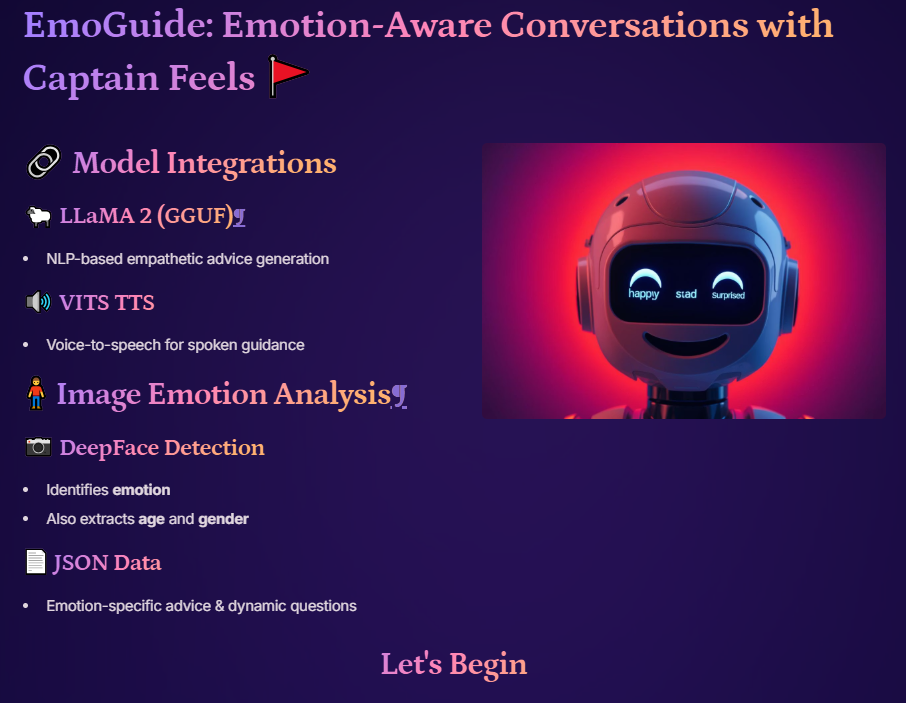







# 🌟 Import Libraries 

In [2]:
# ============================================
# 📦 Controlled Installation with Error Reporting
# ============================================

import subprocess

def install_package(command, description=""):
    try:
        result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {description or command}")
        print(e.stderr.decode())
    else:
        print(f"✅ {description or command} installed successfully.")

# --------------------------------------------
# 🔍 Face Analysis (DeepFace)
# --------------------------------------------
install_package("pip install deepface", "DeepFace")

# --------------------------------------------
# 🧠 Text-to-Text (NLP Models)
# --------------------------------------------
install_package("pip install transformers", "Transformers")
install_package("pip install -q ctransformers", "CTransformers")


# --------------------------------------------
# 🔊 Text-to-Speech (TTS & Audio)
# --------------------------------------------
install_package("apt-get install -y espeak-ng", "eSpeak NG (system)",)  # Use only on Linux/Colab
install_package("pip install py-espeak-ng phonemizer TTS", "TTS tools")
install_package("pip install soundfile", "Audio packages")

# --------------------------------------------
# 🌐 Web Interface (Gradio)
# --------------------------------------------
install_package("pip install gradio", "Gradio")


✅ DeepFace installed successfully.
✅ Transformers installed successfully.
✅ CTransformers installed successfully.
✅ eSpeak NG (system) installed successfully.
✅ TTS tools installed successfully.
✅ Audio packages installed successfully.
✅ Gradio installed successfully.


In [11]:
# ============================================
# 📷 Image Processing & Analysis
# ============================================
# Top of the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from deepface import DeepFace
import io
# ============================================
# 📝 Text Processing & Language Models
# ============================================
import json
import random
from ctransformers import AutoModelForCausalLM

# ============================================
# 🌐 Web App Interface
# ============================================
import gradio as gr


**📌note: import the TTS separately as below. Otherwise, it may raise conflict.**

In [5]:
# ============================================
# 🔊 Text-to-Speech & Audio Handling
# ============================================
from TTS.api import TTS
import tempfile
import os
from IPython.display import Audio, display

# 📨 Load Model and Datasset

In [35]:
# ===============================
# === Load LLaMA 2 model (GGUF)
# ===============================
llm = AutoModelForCausalLM.from_pretrained(
    "TheBloke/Llama-2-7B-Chat-GGUF",
    model_file="llama-2-7b-chat.Q4_K_M.gguf",
    model_type="llama",
    gpu_layers=0
)

# ===============================
# === Load TTS model for audio
# ===============================
tts = TTS(model_name="tts_models/en/vctk/vits", progress_bar=False)
speaker = "p226"

# ===============================
# === Load JSON advice data
# ===============================
with open("/kaggle/input/emontions/emontions_advice.json", "r") as f:
    advice_data = json.load(f)


# Example usage:
image_path = "/kaggle/input/express-image/facial expression-1.jpg"



Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

 > tts_models/en/vctk/vits is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


**📌note: This Dataset is prepared manually**

Manually Generated JSON data. By mixing with question, user_response, advice, and LLMA own weight while prompting to get better result. 

In [30]:
advice_data[0:2]

[{'emotion': 'angry',
  'question': 'What triggered your anger recently?',
  'user_response': 'Someone took credit for my idea at work.',
  'advice': ["It's okay to feel angry when your contributions aren't acknowledged. Take a moment to breathe deeply and process your emotions. It might be helpful to address the issue directly with the person involved in a calm and constructive manner.",
   'When feeling angry, it’s important to communicate your feelings clearly and respectfully. Consider talking to your manager or the person involved to ensure your contributions are recognized going forward.',
   "Anger can cloud judgment, so it's beneficial to reflect on the situation and gain some distance before taking action. This can help you address the situation in a way that resolves the issue without further escalating it.",
   "Try journaling your feelings to gain clarity on why you're upset. This may help you process your emotions and figure out the most effective way to address the situat

# 🔊 Welcome Audio (Text 2 Speech)

In [20]:
# ============================================================
# =======================Text2Audio===========================
# ============================================================


# === Welcome message and playback ===
welcome_text = (
    "Hello! I’m Captain Feels — your virtual Emo Bot and Emotion Assistant. Please be patient as we go through the process. First, you’ll hear a short audio message. Then, upload or drag and drop your image for analysis. Finally, I’ll guide you with personalized advice and a few interactive questions."

)

# Create a temp .wav file and synthesize audio
_, audio_path = tempfile.mkstemp(suffix=".wav")
tts.tts_to_file(text=welcome_text, speaker=speaker, file_path=audio_path)

# === Display welcome message audio player ===
print("🔊 Playing welcome message...")
display(Audio(audio_path, autoplay=True))



 > Text splitted to sentences.
['Hello!', 'I’m Captain Feels — your virtual Emo Bot and Emotion Assistant.', 'Please be patient as we go through the process.', 'First, you’ll hear a short audio message.', 'Then, upload or drag and drop your image for analysis.', 'Finally, I’ll guide you with personalized advice and a few interactive questions.']
 > Processing time: 13.4678635597229
 > Real-time factor: 0.7820173366580906
🔊 Playing welcome message...


# 📷 Analyze Emotion from Facial Expression Using Deepface

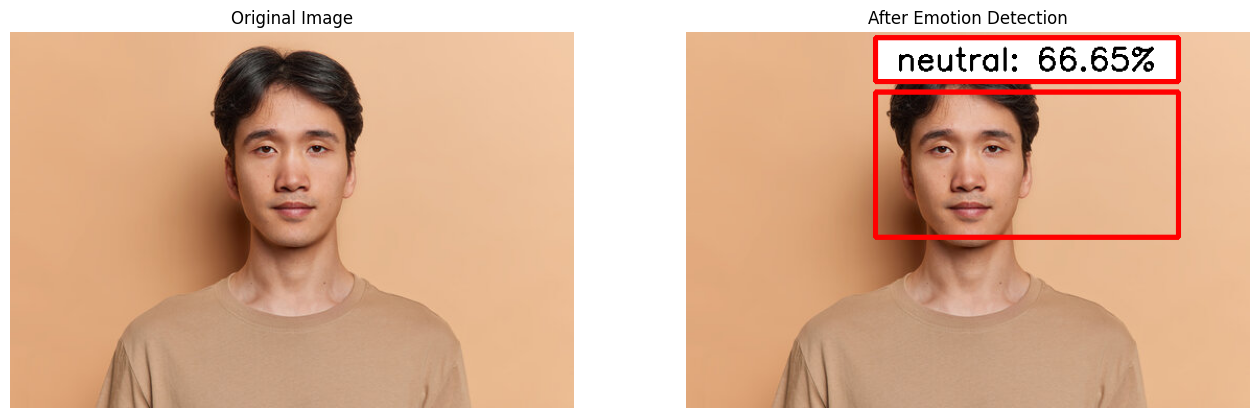

In [34]:
# ===========================================================================
# === Analyze Emotion and Display Image with Labels Using Deepface ==========
# ===========================================================================

def analyze_emotion_and_display(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Copy image for annotation
    img_annotated = img_rgb.copy()

    # Perform facial emotion analysis
    emotions = DeepFace.analyze(img_path=image_path, actions=['emotion'])

    # Draw bounding boxes & labels with emotion and percentage
    for face in emotions:
        x, y, w, h = face['region']['x'], face['region']['y'], face['region']['w'], face['region']['h']
        dominant_emotion = face['dominant_emotion']
        emotion_percentage = face['emotion'][dominant_emotion]

        text = f"{dominant_emotion}: {emotion_percentage:.2f}%"
        text_size, baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        text_width, text_height = text_size

        padding = 20
        
        rect_width = max(w, text_width) + padding * 2
        rect_x1 = x - padding
        rect_x2 = rect_x1 + rect_width

        rect_y1 = y - text_height - padding - 10
        rect_y2 = rect_y1 + text_height + padding

        # Draw white background for text
        cv2.rectangle(img_annotated, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 255, 255), -1)

        # Draw red border around text box
        cv2.rectangle(img_annotated, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 0, 0), 4)

        text_x = rect_x1 + (rect_width - text_width) // 2
        text_y = rect_y1 + (text_height + padding) // 2 + baseline
        cv2.putText(img_annotated, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

        face_rect_x1 = x - padding
        face_rect_x2 = max(x + w + padding, rect_x2)

        # Draw face rectangle
        cv2.rectangle(img_annotated, (face_rect_x1, y), (face_rect_x2, y + h), (255, 0, 0), 4)

    # Create subplot: original on left, annotated on right
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_annotated)
    plt.title("After Emotion Detection")
    plt.axis("off")

    plt.show()

# Usage example
image_path = "/kaggle/input/express-image/facial expression-1.jpg"
analyze_emotion_and_display(image_path)


In [36]:
# ===========================================================================
# ================Personal Feature Extraction from Facial Image==============
# ===========================================================================

# Analyze image for multiple attributes
analysis = DeepFace.analyze(img_path=image_path, actions=['emotion', 'age', 'gender'])

# Print analysis results
print("Full Analysis:", analysis)
df = pd.json_normalize(analysis)
df

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

Full Analysis: [{'emotion': {'angry': 3.4802183508872986, 'disgust': 0.0026934083507512696, 'fear': 3.5416383296251297, 'happy': 0.004456741953617893, 'sad': 26.317083835601807, 'surprise': 0.0011320313205942512, 'neutral': 66.65277481079102}, 'dominant_emotion': 'neutral', 'region': {'x': 201, 'y': 57, 'w': 139, 'h': 139, 'left_eye': (292, 109), 'right_eye': (243, 111)}, 'face_confidence': 0.86, 'age': 23, 'gender': {'Woman': 0.020720058819279075, 'Man': 99.97928738594055}, 'dominant_gender': 'Man'}]


,dominant_emotion,face_confidence,age,dominant_gender,emotion.angry,emotion.disgust,emotion.fear,emotion.happy,emotion.sad,emotion.surprise,emotion.neutral,region.x,region.y,region.w,region.h,region.left_eye,region.right_eye,gender.Woman,gender.Man
0,neutral,0.86,23,Man,3.480218,0.002693,3.541638,0.004457,26.317084,0.001132,66.652775,201,57,139,139,"(292, 109)","(243, 111)",0.02072,99.979287


In [37]:
# ===========================================================================
# ================Personal Feature Extraction from Facial Image==============
# ===========================================================================

df['dominant_emotion'][0]

df['dominant_emotion'][0]
'neutral'
print(f"YOUR CURRENT EMOTION: {df['dominant_emotion'][0].upper()}")
print(f"YOUR FACE CONFIDENCE: {df['face_confidence'][0] * 100:.2f}%")
print(f"YOUR APPROXIMATE AGE: {df['age'][0]}")
print(f"YOUR GENDER: {df['dominant_gender'][0].upper()}")

YOUR CURRENT EMOTION: NEUTRAL
YOUR FACE CONFIDENCE: 86.00%
YOUR APPROXIMATE AGE: 23
YOUR GENDER: MAN


In [38]:
# ============================================================
# === Treemap Visualization ==================================
# ============================================================

def create_hierarchical_tree(df):
    # Create hierarchical data based on the structure you want
    labels = [
        "Person Info", 
        f"CURRENT EMOTION: {df['dominant_emotion'][0].upper()}",
        f"FACE CONFIDENCE: {df['face_confidence'][0] * 100:.2f}%",
        f"APPROXIMATE AGE: {df['age'][0]}",
        f"GENDER: {df['dominant_gender'][0].upper()}"
    ]
    
    # Define the structure of the tree
    parents = [
        "",  # Root
        "Person Info",  # Emotion is child of Person Info
        "Person Info",  # Confidence is child of Person Info
        "Person Info",  # Age is child of Person Info
        "Person Info",  # Gender is child of Person Info
    ]

     # Create the hierarchical tree plot
    fig = go.Figure(go.Treemap(
        labels=labels,
        parents=parents,
        marker=dict(colors=[0, 1, 2, 3, 4], colorscale='Sunset'),
        textinfo="label+value",  # Display label and value
        #texttemplate="%{label}<br>%{value}",  # Add line break to keep label and value centered
        textfont=dict(size=16, family="Arial, sans-serif", color="black", weight="bold"),  # Make the font bold and larger
        insidetextfont=dict(size=16, family="Arial, sans-serif", color="black", weight="bold"),  # Font for text inside blocks
        textposition="middle center"  # Text centered in the middle of each block
    ))

    # Show the plot
    fig.update_layout(
        title="Emotion And Personal Info By Extracting Your Photo",
        font=dict(size=18, family="Arial, sans-serif", color="blue"),  # Overall font adjustments
    )

    # Show the plot
    fig.show()

# Call the function to create the hierarchical tree plot
create_hierarchical_tree(df)


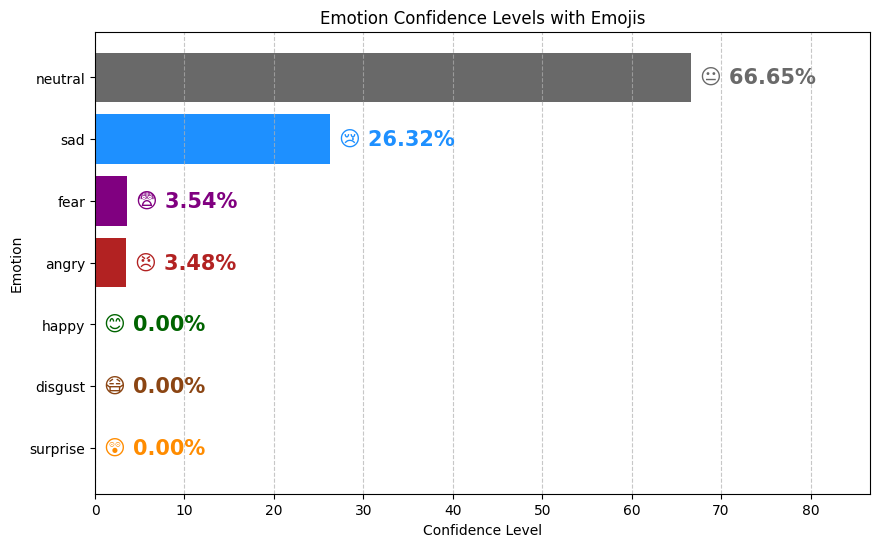

In [39]:
# ============================================================
# === Plot Emotion Confidence ================================
# ============================================================

def plot_emotion_confidence(df):
    # Filter the dataframe to include only the desired columns
    df_filter = df[['emotion.angry', 'emotion.disgust', 'emotion.fear', 'emotion.happy', 'emotion.sad', 'emotion.surprise', 'emotion.neutral']]

    # Rename the columns
    df_filter.columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    # Emoji mapping based on emotion
    emotion_to_emoji = {
        'angry': '😠',
        'disgust': '😷',  # Updated disgust emoji
        'fear': '😨',
        'happy': '😊',
        'sad': '😢',
        'surprise': '😲',
        'neutral': '😐'
    }

    # Color mapping for emojis based on emotions (making them colorful)
    emotion_to_color = {
        'angry': '#B22222',  # Dark Red
        'disgust': '#8B4513',  # Dark Brown
        'fear': '#800080',  # Dark Purple
        'happy': '#006400',  # Bottle Green
        'sad': '#1E90FF',  # Dodger Blue (Blue)
        'surprise': '#FF8C00',  # Dark Orange
        'neutral': '#696969'  # Dark Gray
    }

    # Sorting columns based on their single values (highest to lowest)
    sorted_columns = df_filter.iloc[0].sort_values(ascending=False)  # Assuming you want to sort based on the first row

    # Create horizontal bar chart with color intensity based on values
    plt.figure(figsize=(10, 6))

    # Plot bars
    bars = plt.barh(sorted_columns.index, sorted_columns, color=[emotion_to_color[emotion] for emotion in sorted_columns.index])

    # Add emojis and confidence level in percentage next to each bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        
        # Add colorful emoji and confidence percentage together at the end of each bar
        plt.text(width + 1, bar.get_y() + bar.get_height() / 2, 
                 f'{emotion_to_emoji[sorted_columns.index[i]]} {width:.2f}%', 
                 va='center', ha='left', color=emotion_to_color[sorted_columns.index[i]], fontweight='bold', fontsize=15)

    # Add gridlines
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Invert the y-axis to show the highest value at the top
    plt.gca().invert_yaxis()

    # Set the x-axis scale to extend by 10 units beyond the max value
    max_value = sorted_columns.max()
    plt.xlim(0, max_value + 20)

    # Add title and labels
    plt.title('Emotion Confidence Levels with Emojis')
    plt.xlabel('Confidence Level')
    plt.ylabel('Emotion')

    # Show the plot
    plt.show()
    
# Call the function with your dataframe
plot_emotion_confidence(df)


# 🤖 Caption Feels EmoBot using llama model

In [26]:
# ============================================================
# === NLP Advice Generation ==================================
# ============================================================

# === Emotion Coming from Facial Image Extraction ===
emotion = df['dominant_emotion'][0]

# === Get default questions for emotion ===
def get_default_questions(emotion):
    questions = [entry["question"] for entry in advice_data if entry["emotion"] == emotion]
    return questions[:5] if questions else ["Can you share how you're feeling today?"]

# === Generate advice using LLaMA-2 ===
def get_advice_from_json(emotion, user_response):
    entries = [entry for entry in advice_data if entry["emotion"] == emotion]
    if not entries:
        return "Sorry, I don’t have advice for that feeling yet."

    entry = random.choice(entries)
    advice = random.choice(entry["advice"])

    prompt = (
        f"User feels {emotion} and said: '{user_response}'.\n"
        f"Advice: \"{advice}\"\n"
        f"Rewrite this as a single empathetic sentence directly addressing the user's situation. "
        f"Respond only with the rephrased line in quotes, no explanation or questions."
    )

    try:
        response = llm(prompt, max_new_tokens=60, temperature=0.7)
        return response.strip().strip('"')
    except Exception as e:
        return f"Error generating advice: {e}"

# === Terminal-style Chat Loop ===
def terminal_chat():
    print("\n🧠 Emotion-Aware Advice Chatbot (Terminal Mode)")
    print(f"✅ Captain Feels: I can sense, you are {emotion}.")

    valid_emotions = {entry["emotion"] for entry in advice_data}
    if emotion not in valid_emotions:
        print("❌ Emotion not recognized. Please set a valid emotion.")
        return

    questions = get_default_questions(emotion)
    q_idx = 0

    print(f"\n Captain Feels🤖 Q1: {questions[0]}")
    while True:
        user_input = input("You: ").strip()
        if user_input.lower() in ["exit", "stop", "goodbye"]:
            print("\n Captain Feels🤖: Thank you for exploring. If you liked it, share & like my LinkedIn post 🌟\n\n"
            "🤖 Keep shining. Take care 🌸")
            break

        advice = get_advice_from_json(emotion, user_input)
        print(f"💡 Advice: {advice}")

        # Ask next question if available
        q_idx += 1
        if q_idx < len(questions):
            print(f"\n Captain Feels🤖: Q{q_idx + 1}: {questions[q_idx]}")
        else:
            print("\nCaptain Feels 🤖: You’ve finally completed the journey. You’re doing your best 🌈.\n"
                "If you enjoyed this experience, please like and share my LinkedIn post 🌟. 🤖\n"
                "Keep shining, take care 🌸 and thank you for sharing! 🌈"
                )
            break

# Run the chatbot
terminal_chat()








🧠 Emotion-Aware Advice Chatbot (Terminal Mode)
✅ Captain Feels: I can sense, you are neutral.

 Captain Feels🤖 Q1: How are you feeling overall today?


You:  I am exhausting with large amount of work


💡 Advice: Remember that anticipation can be a good motivator, focus on what you can do in the meantime, and feedback is an opportunity for growth and improvement.

 Captain Feels🤖: Q2: Is there anything you'd like to change?


You:  yes, I wish I would change the time.


💡 Advice: Yes, I understand. Making a plan or jotting down priorities can help you feel more in control and reduce overwhelm.

 Captain Feels🤖: Q3: Have you been in this mood for long?


You:  yes. I am going through this mood several days


💡 Advice: Yes, breaking tasks into smaller steps can help you feel more in control and less overwhelmed.

 Captain Feels🤖: Q4: What’s one thing on your mind right now?


You:  I need some peace. But it only happens when I achieve the goal.


💡 Advice: Being in a neutral mood for a few days is completely natural. If you’re open to it, try small actions that can bring a spark of positivity or excitement back into your day.

 Captain Feels🤖: Q5: What kind of day are you having?


You:  It's as usual day. Practice and earning


💡 Advice: 😊
"Start small by taking a break, going for a walk, or doing something that boosts your mood.

Captain Feels 🤖: You’ve finally completed the journey. You’re doing your best 🌈.
If you enjoyed this experience, please like and share my LinkedIn post 🌟. 🤖
Keep shining, take care 🌸 and thank you for sharing! 🌈


# 🌳 EmoGuide: Emotion-Aware Conversations with Captain Feels and Deploy in Gradio



In [ ]:
# ============================================================
# === Load LLaMA 2 model (GGUF) ==============================
# ============================================================

llm = AutoModelForCausalLM.from_pretrained(
    "TheBloke/Llama-2-7B-Chat-GGUF",
    model_file="llama-2-7b-chat.Q4_K_M.gguf",
    model_type="llama",
    gpu_layers=0
)

# ============================================================
# === Load TTS model for audio ===============================
# ============================================================

tts = TTS(model_name="tts_models/en/vctk/vits", progress_bar=False)
speaker = "p226"

# ============================================================
# === Load JSON advice data ==================================
# ============================================================

with open("/kaggle/input/emontions/emontions_advice.json", "r") as f:
    advice_data = json.load(f)

# ===========================================================================
# === Analyze Emotion and Display Image with Labels Using Deepface ==========
# ===========================================================================

def analyze_emotion_and_display(image):
    img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    temp_path = "temp_image.jpg"
    cv2.imwrite(temp_path, img_bgr)
    emotions = DeepFace.analyze(img_path=temp_path, actions=['emotion'])
    padding = 50
    img_rgb_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])

    for face in emotions:
        x, y, w, h = face['region']['x'], face['region']['y'], face['region']['w'], face['region']['h']
        dominant_emotion = face['dominant_emotion']
        emotion_percentage = face['emotion'][dominant_emotion]

        text = f"{dominant_emotion}: {emotion_percentage:.2f}%"
        text_size, baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        text_width, text_height = text_size
        pad = 20
        x += padding
        y += padding
        rect_width = max(w, text_width) + pad * 2
        rect_x1 = x - pad
        rect_x2 = rect_x1 + rect_width
        rect_y1 = y - text_height - pad - 10
        rect_y2 = rect_y1 + text_height + pad

        cv2.rectangle(img_rgb_padded, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 255, 255), -1)
        cv2.rectangle(img_rgb_padded, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 0, 0), 4)
        text_x = rect_x1 + (rect_width - text_width) // 2
        text_y = rect_y1 + (text_height + pad) // 2 + baseline
        cv2.putText(img_rgb_padded, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        face_rect_x1 = x - pad
        face_rect_x2 = max(x + w + pad, rect_x2)
        cv2.rectangle(img_rgb_padded, (face_rect_x1, y), (face_rect_x2, y + h), (255, 0, 0), 4)

    return img_rgb_padded

# ============================================================
# === Full Face Analysis (Emotion, Age, Gender) ==============
# ============================================================

def analyze_full_info(image):
    temp_path = "temp_image.jpg"
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(temp_path, image_bgr)
    analysis = DeepFace.analyze(img_path=temp_path, actions=['emotion', 'age', 'gender'])
    df = pd.json_normalize(analysis)
    return df
    
# ============================================================
# === Treemap Visualization ==================================
# ============================================================

def create_hierarchical_tree(df):
    labels = [
        "Person Info",
        f"CURRENT EMOTION: {df['dominant_emotion'][0].upper()}",
        f"FACE CONFIDENCE: {df['face_confidence'][0] * 100:.2f}%",
        f"APPROXIMATE AGE: {df['age'][0]}",
        f"GENDER: {df['dominant_gender'][0].upper()}"
    ]
    parents = ["", "Person Info", "Person Info", "Person Info", "Person Info"]

    fig = go.Figure(go.Treemap(
        labels=labels,
        parents=parents,
        marker=dict(colors=[0, 1, 2, 3, 4], colorscale='Sunset'),
        textinfo="label+value",
        textfont=dict(size=16, family="Arial", color="black"),
        insidetextfont=dict(size=16, color="black"),
        textposition="middle center"
    ))

    fig.update_layout(title="Emotion And Personal Info From Photo")
    return fig
    
# ============================================================
# === Plot Emotion Confidence ================================
# ============================================================

def plot_emotion_confidence(df):
    df_filter = df[['emotion.angry', 'emotion.disgust', 'emotion.fear', 'emotion.happy', 'emotion.sad', 'emotion.surprise', 'emotion.neutral']]
    df_filter.columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    emotion_to_emoji = {
        'angry': '😠', 'disgust': '😷', 'fear': '😨',
        'happy': '😊', 'sad': '😢', 'surprise': '😲', 'neutral': '😐'
    }
    emotion_to_color = {
        'angry': '#B22222', 'disgust': '#8B4513', 'fear': '#800080',
        'happy': '#006400', 'sad': '#1E90FF', 'surprise': '#FF8C00', 'neutral': '#696969'
    }

    sorted_columns = df_filter.iloc[0].sort_values(ascending=False)
    fig = go.Figure()
    for emo in sorted_columns.index:
        fig.add_trace(go.Bar(
            x=[sorted_columns[emo]],
            y=[f"{emotion_to_emoji[emo]} {emo}"],
            orientation='h',
            marker=dict(color=emotion_to_color[emo]),
            name=emo,
            text=[f"{sorted_columns[emo]:.2f}%"],
            textposition='outside'
        ))

    fig.update_layout(
        title="Emotion Confidence Levels with Emojis",
        xaxis_title="Confidence Level",
        yaxis_title="Emotion",
        barmode='stack',
        height=400
    )
    fig.update_xaxes(range=[0, 110])
    return fig

# ============================================================
# === NLP Advice Generation ==================================
# ============================================================

def get_default_questions(emotion):
    questions = [entry["question"] for entry in advice_data if entry["emotion"] == emotion]
    return questions[:5] if questions else ["Can you share how you're feeling today?"]

def get_advice_from_json(emotion, user_response):
    entries = [entry for entry in advice_data if entry["emotion"] == emotion]
    if not entries:
        return "Sorry, I don’t have advice for that feeling yet."
    entry = random.choice(entries)
    advice = random.choice(entry["advice"])
    prompt = (
        f"User feels {emotion} and said: '{user_response}'.\n"
        f"Advice: \"{advice}\"\n"
        f"Rewrite this as a single empathetic sentence directly addressing the user's situation. "
        f"Respond only with the rephrased line in quotes, no explanation or questions."
    )
    try:
        response = llm(prompt, max_new_tokens=60, temperature=0.7)
        return response.strip().strip('"')
    except Exception as e:
        return f"Error generating advice: {e}"
        
# ============================================================
# === Chat Logic with Question Flow ==========================
# ============================================================

def chat(emotion, user_input, history):
    if user_input.lower() in ["exit", "goodbye", "stop"]:
        final_msg = (
            "Captain Feels🤖: Thank you for exploring. If you liked it, share & like my LinkedIn post 🌟\n\n"
            "🤖 Keep shining. Take care 🌸"
        )
        return history + [[f"You: {user_input}", final_msg]], ""
    advice = get_advice_from_json(emotion, user_input)
    new_pair = [f"You: {user_input}", f"💡 Advice: {advice}"]
    return history + [new_pair], ""

def respond(emotion, user_text, chat_hist, questions, q_idx):
    # Check if the user wants to exit
    if user_text.lower() in ["exit", "goodbye", "stop"]:
        return chat(emotion, user_text, chat_hist) + (questions, q_idx)

    # Update chat history with user's input
    updated_chat, _ = chat(emotion, user_text, chat_hist)

    # Increment index to get the next question (skip Q1 if already shown)
    if q_idx < len(questions):
        next_q = questions[q_idx]
        updated_chat.append([f"Captain Feels 🤖: Q{q_idx + 1}: {next_q}", ""])
        q_idx += 1  # Increment index for the next question
    else:
        updated_chat.append(["Captain Feels 🤖: You’ve finally completed the journey. You’re doing your best 🌈.\n\n"
                             "If you enjoyed this experience, please like and share my LinkedIn post 🌟. 🤖 Keep shining, take care 🌸, and thank you for sharing! 🌈", ""])

    return updated_chat, "", questions, q_idx

# ============================================================
# === Main Gradio App Logic ====================================
# ============================================================

# Stage 1: Play welcome audio immediately
# Pre-generate welcome audio before launching app

def generate_welcome_audio():
    welcome_text = (
        "Hello! I’m Captain Feels — your virtual Emo Bot and Emotion Assistant. Please be patient as we go through the process. First, you’ll hear a short audio message. Then, upload or drag and drop your image for analysis. Finally, I’ll guide you with personalized advice and a few interactive questions."

    )
    _, audio_path = tempfile.mkstemp(suffix=".wav")
    tts.tts_to_file(text=welcome_text, speaker="p226", file_path=audio_path)
    return audio_path

welcome_audio_path = generate_welcome_audio()

# Stage 2: Process image after audio has started

def process_image(image):
    result_img = analyze_emotion_and_display(image)
    df = analyze_full_info(image)
    emotion = df['dominant_emotion'][0]

    markdown_text = f"### ✅ Captain Feels: I sense you're feeling **{emotion.upper()}**."
    questions = get_default_questions(emotion)
    chatbot_start = [["", f"Captain Feels 🤖: Q1: {questions[0]}"]]

    fig1 = create_hierarchical_tree(df)
    fig2 = plot_emotion_confidence(df)

    return (
        result_img, fig1, fig2,
        markdown_text, chatbot_start, emotion,
        questions, 1
    )


# ============================================================
# === Gradio App UI Logic ====================================
# ============================================================

def gradio_app(image):
    result_img = analyze_emotion_and_display(image)
    df = analyze_full_info(image)
    emotion = df['dominant_emotion'][0]
    markdown_text = f"### ✅ Captain Feels: I sense you're feeling **{emotion.upper()}**."
    
    questions = get_default_questions(emotion)
    chatbot_start = [["", f"Captain Feels 🤖: Q1: {questions[0]}"]]
    
    fig1 = create_hierarchical_tree(df)
    fig2 = plot_emotion_confidence(df)
    # 1 --> to skip 1st question. starts with index-1
    return (
        result_img, fig1, fig2,
        markdown_text, chatbot_start, emotion,
        questions, 1
    )

with gr.Blocks() as app:
    # Step 1: Welcome audio that auto-plays on app launch
    gr.Markdown("# 😎 EmoGuide: Emotion-Aware Conversations with Captain Feels")
    gr.Markdown("## 🚩 Play the Audio and Start the Journey with Patience")
    audio_player = gr.Audio(value=welcome_audio_path, autoplay=True, label="🔊 Captain Feels Says...")

    # Step 2: Upload image
    with gr.Row():
        image_input = gr.Image(type="numpy", label="📸 Upload or Capture Image")
        result_image = gr.Image(type="numpy", label="🧠 Emotion Detection Output")

    run_button = gr.Button("Analyze Emotion 🧠")

    fig1_plot = gr.Plot(label="🌳 Personal Info Treemap")
    fig2_plot = gr.Plot(label="📊 Emotion Confidence Plot")
    advice_output = gr.Markdown("### Captain Feels: Waiting for image...")
    gr.Markdown("##### 🚩 To achieve better results, please write well-structured prompts with explanations.")
    chatbot = gr.Chatbot(label="Captain Feels 🤖", value=[])
    user_input = gr.Textbox(label="💬 Your Message", placeholder="Type your response or 'exit' to end...")
    send_button = gr.Button("Send")

    # States
    emotion_state = gr.State("neutral")
    questions_state = gr.State([])
    question_index = gr.State(0)

    # Image processing triggers emotion analysis and chatbot setup
    run_button.click(
        fn=gradio_app,
        inputs=[image_input],
        outputs=[
            result_image, fig1_plot, fig2_plot,
            advice_output, chatbot,
            emotion_state, questions_state, question_index
        ]
    )

    # Chat interaction
    send_button.click(
        fn=respond,
        inputs=[
            emotion_state, user_input, chatbot,
            questions_state, question_index
        ],
        outputs=[
            chatbot, user_input, questions_state, question_index
        ]
    )

app.launch()


# 🧠 Emotion-Aware Chatbot Summary: Captain Feels 🤖
## 🔗 Model Integrations

### 🐑 LLaMA 2 (GGUF)
- NLP-based empathetic advice generation

### 🔊 VITS TTS
- Voice-to-speech for spoken guidance

### 📄 JSON Data
- Emotion-specific advice & dynamic questions

---

## 🧍‍♂️ Image Emotion Analysis

### 📷 DeepFace Detection
- Identifies **emotion**
- Also extracts **age** and **gender**

### 🖼️ Image Annotation
- Labels face with detected emotions & confidence

---

## 🌳 Data Visualization

### 🧭 Treemap
- Displays **emotion**, **age**, and **gender**

### 📊 Bar Chart
- Shows **emotion confidence** with expressive **emojis**

---

## 💬 Conversational Flow

### 🗨️ Welcome Interaction
- Plays a friendly **welcome audio**

### 💡 Empathetic Chat
- Uses NLP to give **personalized advice**
- Auto-generates **emotion-aware questions**

### 🧵 Chat Memory
- Tracks conversation flow
- Allows **graceful exit** (e.g., “exit” or “goodbye”)

---

## 🎧 Audio Output

### 📥 Pre-Generated Audio
- Plays audio using TTS (VITS)

### 🔄 Future Scope
- Add **voice-based response system**

---

## 🖼️ Gradio UI Logic

### 📤 Workflow
- **Upload Image** → 🧠 Analyze → 🤖 Start Chat

### 🌈 Ending Touch
- Closes with positive message and **LinkedIn share** prompt
